In [45]:
import json
from pathlib import Path
import numpy as np
from PIL import Image
from pycocotools import mask as mask_util

import matplotlib.pyplot as plt
import os
import cv2

In [31]:
ROOT_DIR = Path('/Users/erikstorrs/Downloads/nuclei-segmentation-in-microscope-cell-images')
DATASET_WORKING_DIR = ROOT_DIR / 'Nuclei'

annotations_file = DATASET_WORKING_DIR / 'annotations/cluster_nuclei.json'

# annotations_file = DATASET_WORKING_DIR / 'annotations/stage1_train.json'


COCO = json.load(open(annotations_file.as_posix()))

## create training data

In [32]:
len(COCO['images'])

52

In [33]:
{im_meta['nuclei_class'] for im_meta in COCO['images']}

{'Clustered_Nuclei'}

In [34]:
image_metadata = COCO['images'][0]
image_metadata

{'nuclei_class': 'Clustered_Nuclei',
 'file_name': 'cluster16.bmp.jpg',
 'width': 200,
 'id': 0,
 'height': 200}

In [35]:
def get_masks(im_metadata):
    image_annotations = []
    for annotation in COCO['annotations']:
        if annotation['image_id'] == im_metadata['id']:
            image_annotations.append(annotation)

    segments = [annotation['segmentation'] for annotation in image_annotations]
    masks = mask_util.decode(segments)
    return masks

In [36]:
masks = get_masks(image_metadata)

masks.shape

(200, 200, 17)

##### create training data

In [58]:
output_dir = '/Users/erikstorrs/Documents/ding/cell_segmentation/data/clustered_nuclei'

In [78]:
m = None
for image_metadata in COCO['images']:
    file_name = image_metadata['file_name']
    sample_id = file_name.split('.')[0]
    
    os.mkdir(os.path.join(output_dir, sample_id))
    os.mkdir(os.path.join(output_dir, sample_id, 'masks'))
    
    masks = get_masks(image_metadata)
    for i in range(masks.shape[2]):
        mask = masks[:, :, i]
        mask = np.asarray(mask, np.float)
        m, M = mask.min(), mask.max()
        mask = np.asarray((mask - m) / (M - m + 0.000001) * 255, np.uint8)
        
        cv2.imwrite(os.path.join(output_dir, sample_id, 'masks', f'{sample_id}_{i}.png'), mask)
                    
    
    

In [79]:
directory = '/Users/erikstorrs/Downloads/nuclei-segmentation-in-microscope-cell-images/Nuclei/cluster_nuclei'

fps = [os.path.join(directory, fp) for fp in os.listdir(directory)]

for fp in fps:
    sample_id = fp.split('/')[-1].replace('.bmp.jpg', '')
    
    image = cv2.imread(fp, flags=cv2.IMREAD_COLOR)
    os.mkdir(os.path.join(output_dir, sample_id, 'images'))
    cv2.imwrite(os.path.join(output_dir, sample_id, 'images', f'{sample_id}.png'), image)

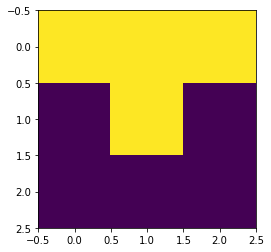

In [67]:
plt.imshow(np.asarray([[1,1,1], [0,1,0], [0,0,0]]))

In [68]:
cv2.imwrite('test.png', np.asarray([[1,1,1], [0,1,0], [0,0,0]]))

True

In [24]:
def show(i):
    i = np.asarray(i, np.float)
    m,M = i.min(), i.max()
    I = np.asarray((i - m) / (M - m + 0.000001) * 255, np.uint8)
    Image.fromarray(I).show()

In [25]:
show(np.sum(masks, -1))

In [69]:
import cv2
import numpy as np
import os

image = cv2.imread('box.png')

path, filename = os.path.split('box.png')
filename = (filename[:-4])

root_path = 'C:\\Users\\Link\\Desktop\\'

h = image.shape[0]
w = image.shape[1]

mask_l = np.zeros(image.shape[:2], dtype="uint8")

roi = cv2.rectangle(mask_l, (w//2, 0), (0, h), 255, -1)  # LEFT MASK

masked_l = cv2.bitwise_and(image, image, mask=mask_l)

list = ['a', 'b']

for i in enumerate(masked_l):
    x, y, w, h = cv2.boundingRect(mask_l)
    roi_l = image[y:y + h, x:x + w]
    cv2.imwrite(root_path + str(filename) + '{}.png'.format(lista[0]), roi_l)

cv2.imshow("Left", roi_l)
cv2.waitKey(0)


h2 = image.shape[0]
w2 = image.shape[1]

mask_r = np.zeros(image.shape[:2], dtype="uint8")

cv2.rectangle(mask_r, (w2//2, 0), (w2, h2), 255, -1)  # RIGHT MASK

masked_r = cv2.bitwise_and(image, image, mask=mask_r)

for i_i in enumerate(masked_r):
    x2, y2, w2, h2 = cv2.boundingRect(mask_r)
    roi_r = image[y2:y2 + h2, x2:x2 + w2]

    cv2.imwrite(root_path + str(filename) + '{}.png'.format(lista[1]), roi_r)

cv2.imshow("Right", roi_r)
cv2.waitKey(0)

AttributeError: 'NoneType' object has no attribute 'shape'